# Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [2]:
df = pd.read_csv('Data/data.csv')

# Data Inspection and Initial Cleaning

In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
len(df.columns)

25

In [5]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [6]:
def columns_info(df):
    columns_df = pd.DataFrame({'nulls': [df[col].isna().sum() for col in df.keys()], 
                         'dtype': [df[col].dtype for col in df.keys()], 
                         'nunique_values': [df[col].nunique() for col in df.keys()], 
                         'unique_values': [df[col].unique()for col in df.keys()], 
                         'value_counts': [df[col].value_counts() for col in df.keys()]}, 
                         index=[col for col in df.keys()])
    return columns_df

In [7]:
df.shape

(30697, 25)

### Dropping Features that will not be used in models
- several "ID" features are unique identifiers for game, event, and shot. These are not important for modeling. 
- several features descripting coordinates on the court will be dropped. 
    - this information overlaps with two other features `shot_distance` and `shot_type`
    
- Kaggle had set up this dataset to have 5000 rows where the Target is Null. This is meant for Kaggle to be able to grade models based on predicted targets for this feature. We removed these 5000 rows as we would not be able to provide metrics on how accurate our model was at predicting the target for these rows since the actual target values here are missing. We will make our own train test split in the Preprocessing notebook. 

In [8]:
df.drop(columns=['game_event_id', 'game_id', 'lat', 'loc_x', 
                 'loc_y', 'lon', 'shot_id', 'team_id', 'team_name'], axis=1, inplace=True)

df.drop(index=df[pd.isna(df.shot_made_flag)].index, inplace=True)
df.reset_index(drop=True, inplace=True)

df.to_csv('Data/data_cleaned.csv', index=False)

In [9]:
df = pd.read_csv('Data/data_cleaned.csv')

In [10]:
df.shape

(25697, 16)

In [11]:
columns_info(df)

,nulls,dtype,nunique_values,unique_values,value_counts
action_type,0,object,55,"[Jump Shot, Driving Dunk Shot, Layup Shot, Run...",Jump Shot 15836 Layup...
combined_shot_type,0,object,6,"[Jump Shot, Dunk, Layup, Tip Shot, Hook Shot, ...",Jump Shot 19710 Layup 4532 Dunk ...
minutes_remaining,0,int64,12,"[10, 7, 6, 9, 8, 3, 1, 11, 2, 0, 5, 4]",0 3248 4 2408 2 2379 3 2377 1 ...
period,0,int64,7,"[1, 2, 3, 4, 5, 6, 7]",3 7002 1 6700 4 6043 2 5635 5 ...
playoffs,0,int64,2,"[0, 1]","0 21939 1 3758 Name: playoffs, dtype: i..."
season,0,object,20,"[2000-01, 2001-02, 2002-03, 2003-04, 2004-05, ...",2005-06 1924 2002-03 1852 2008-09 185...
seconds_remaining,0,int64,60,"[22, 45, 52, 19, 32, 12, 36, 56, 0, 9, 44, 16,...",0 833 1 541 2 508 4 480 28 ...
shot_distance,0,int64,74,"[15, 16, 22, 0, 14, 12, 25, 17, 9, 5, 20, 18, ...",0 4608 25 1631 24 1263 17 1225 18...
shot_made_flag,0,float64,2,"[0.0, 1.0]",0.0 14232 1.0 11465 Name: shot_made_flag...
shot_type,0,object,2,"[2PT Field Goal, 3PT Field Goal]",2PT Field Goal 20285 3PT Field Goal 541...


# EDA

In [12]:
def descriptive_stats(col):
    unique_values = df[col].unique()

    print(f'{df[col].describe()}\n \
    \n# of Unique values:{df[col].nunique()} \
    \n\nUnique values: {unique_values}')
    
    if df[col].dtypes != object:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        min_boxplot = Q1 - (1.5 * IQR)
        max_boxplot = Q3 + (1.5 * IQR)
        print(f'\nMin of boxplot:{min_boxplot: .2f}\nMax of boxplot: {max_boxplot:.2f}')       

In [13]:
def plotcat(feature):
    plt.figure(figsize=(12,8))
    sns.countplot(x=feature, hue='shot_made_flag', data=df, palette={1:'gold', 0:'purple'});

    plt.title(feature + ' vs target', 
              fontsize=18, fontweight='bold', color='firebrick', loc='left')
    
    plt.ylabel('count', fontsize=16)
    plt.xlabel(feature, fontsize=16)

    color_patches = [
        Patch(facecolor="gold", label='Shot Made'),
        Patch(facecolor="purple", label='Shot Missed')
    ]

    plt.legend(handles=color_patches)

    plt.xticks(rotation=45, fontsize=14); 

In [14]:
def box_plot(column_name):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

    sns.boxplot(data=df[column_name], 
                ax=ax1,
                showmeans=True, 
                width=0.5,
                palette=('gold', 8))
    
    ax2.hist(df[column_name], color='purple', orientation='horizontal')    

    ax1.set_title(column_name + ' - Boxplot',
                 fontsize=18, 
                 fontweight='bold', 
                 color='firebrick', 
                 loc='left')
    ax2.set_title(column_name + ' Frequency',
                 fontsize=18, 
                 fontweight='bold', 
                 color='firebrick', 
                 loc='left')
    
    ax1.set_ylabel(column_name, fontsize=16)
    
    ax2.set_ylabel(column_name, fontsize=16)
    ax2.set_xlabel('Frequency', fontsize=16)
    
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)

    ax1.set_facecolor('whitesmoke')
    ax2.set_facecolor('whitesmoke');

In [15]:
def multihist(col):
    plt.figure(figsize=(12,8))
    plt.hist(df[df['shot_made_flag']==1][col], 
             bins=10, alpha=0.7, color='black', label='Shot Made')
    plt.hist(df[df['shot_made_flag']==0][col], 
             bins=10, alpha=0.5, color='gold', label='Shot Missed')

    plt.title(col + ' vs Shot Made', 
              fontsize=18, fontweight='bold', color='firebrick', loc='left')
    
    plt.xlabel(col, fontsize=14)
    plt.ylabel('count', fontsize=14)

    plt.legend();

## Target - `shot_made_flag`

''

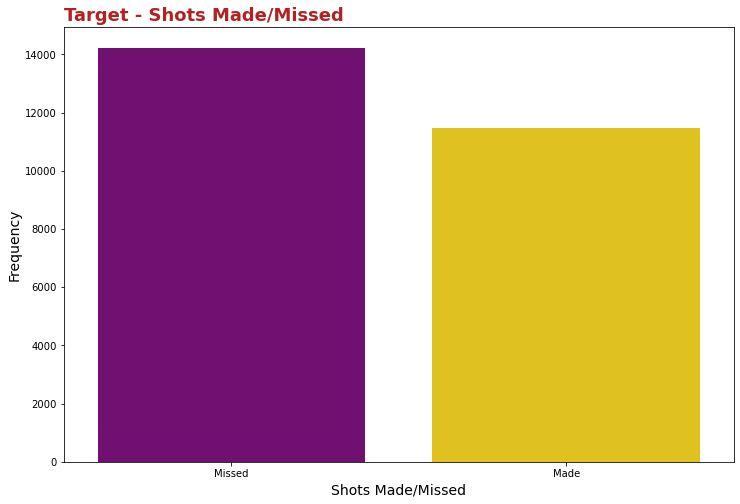

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x='shot_made_flag', data=df, palette={1:'gold', 0:'purple'})

plt.title('Target - Shots Made/Missed',
             fontsize=18, 
             fontweight='bold', 
             color='firebrick', 
             loc='left')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Shots Made/Missed', fontsize=14)

plt.xticks([0.0, 1.0], ['Missed', 'Made'])
;

In [17]:
df.shot_made_flag.value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

### Target - Shots Made

Observations
- The baseline is 55% as Shots Missed 

## Let's look at `action_type` feature.

In [18]:
descriptive_stats('action_type')

count         25697
unique           55
top       Jump Shot
freq          15836
Name: action_type, dtype: object
     
# of Unique values:55     

Unique values: ['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Rev

### Kobe had 55 unique different types of shots in his arsenal. His most common was the jump shot with over 15k shot attempts.

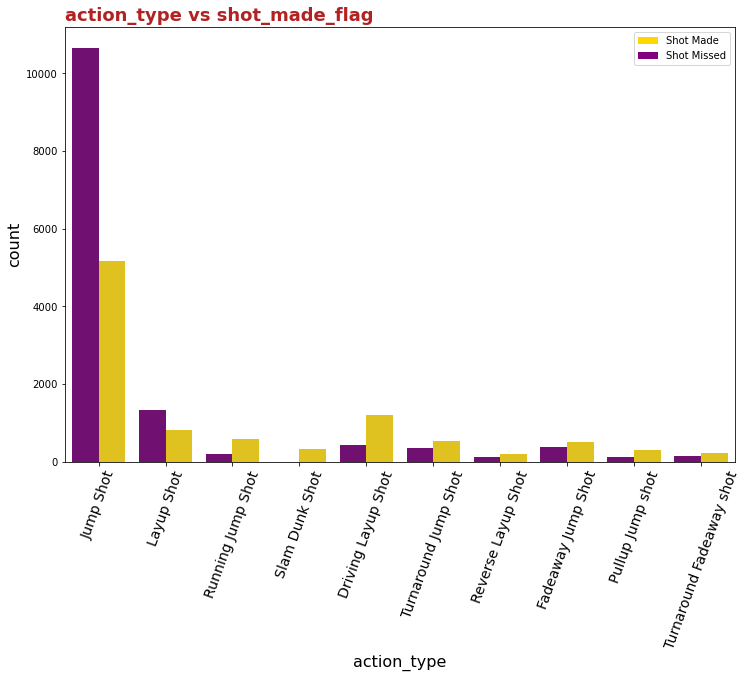

In [19]:
top_10_most_frequent_shots = df['action_type'].value_counts()[:10].index

plt.figure(figsize=(12,8))
sns.countplot(x='action_type', hue='shot_made_flag', data=df.loc[df['action_type'].isin(top_10_most_frequent_shots)]
              , palette={1:'gold', 0:'purple'});

plt.title('action_type' + ' vs shot_made_flag', 
          fontsize=18, fontweight='bold', color='firebrick', loc='left')

plt.ylabel('count', fontsize=16)
plt.xlabel('action_type', fontsize=16)

color_patches = [
    Patch(facecolor="gold", label='Shot Made'),
    Patch(facecolor="purple", label='Shot Missed')
]

plt.legend(handles=color_patches)

plt.xticks(rotation=70, fontsize=14); 

### Kobe missed more jump shots than he made but was still his most made shot type by far. Out of his 10 most common shot types Kobe only missed more on jump shots and layup shots. Every other shot type he made more than he missed.

## Now let's look at `combined_shot_type` feature.

In [20]:
descriptive_stats('combined_shot_type')

count         25697
unique            6
top       Jump Shot
freq          19710
Name: combined_shot_type, dtype: object
     
# of Unique values:6     

Unique values: ['Jump Shot' 'Dunk' 'Layup' 'Tip Shot' 'Hook Shot' 'Bank Shot']


### Kobe's most frequent combined shot type was jump shot. He had over 19k shots of this combined shot type.

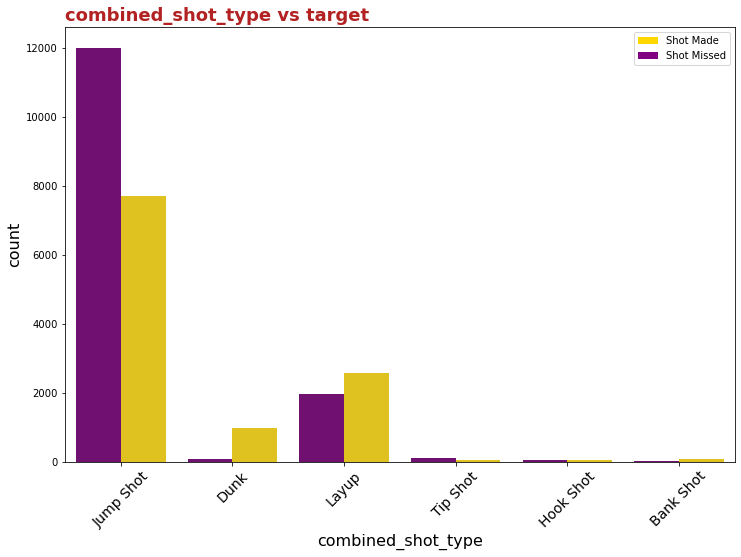

In [21]:
plotcat('combined_shot_type')

### Kobe's combined shot types where he made more than he missed were, Dunks, Layups, Bank Shots. 

## Now let's look at `minutes_remaining` feature.

In [22]:
descriptive_stats('minutes_remaining')

count    25697.000000
mean         4.886796
std          3.452475
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: minutes_remaining, dtype: float64
     
# of Unique values:12     

Unique values: [10  7  6  9  8  3  1 11  2  0  5  4]

Min of boxplot:-7.00
Max of boxplot: 17.00


### Looks like our data looks normal with a mean and median minutes remaining with about the same value. We are looking at minutes remaining between 0 and 11 minutes.

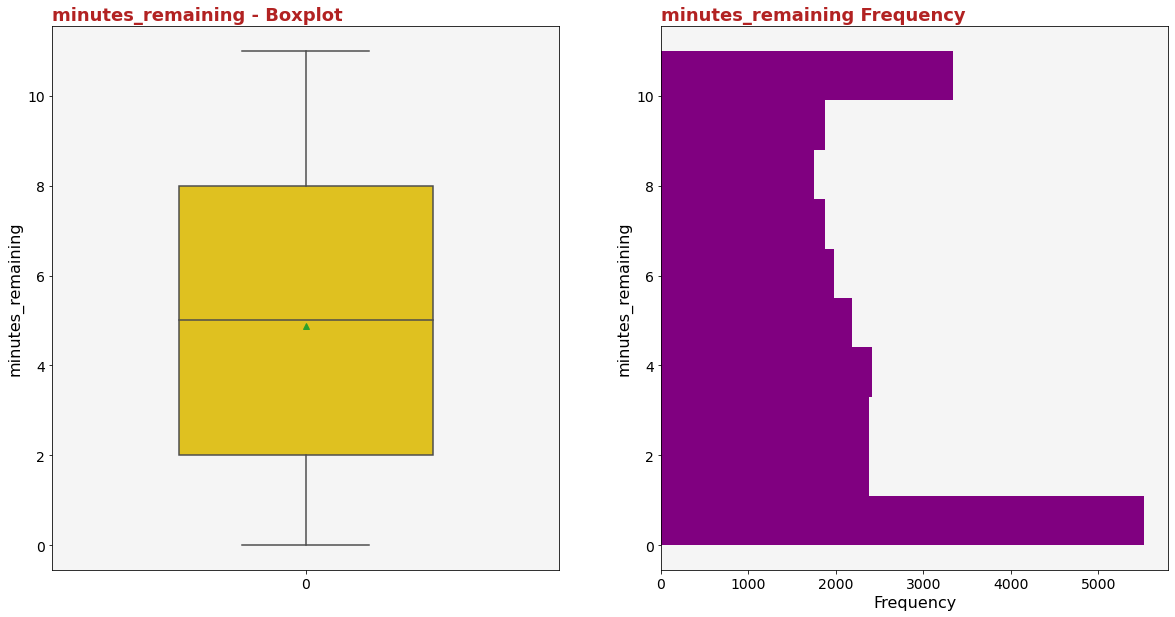

In [23]:
box_plot('minutes_remaining')

### We can see that we have no outliers in our dataset from our boxplot. We can also see that Kobe made the most shots with less than a minute remaining, followed by more than 10 minutes remaining as second highest frequency.

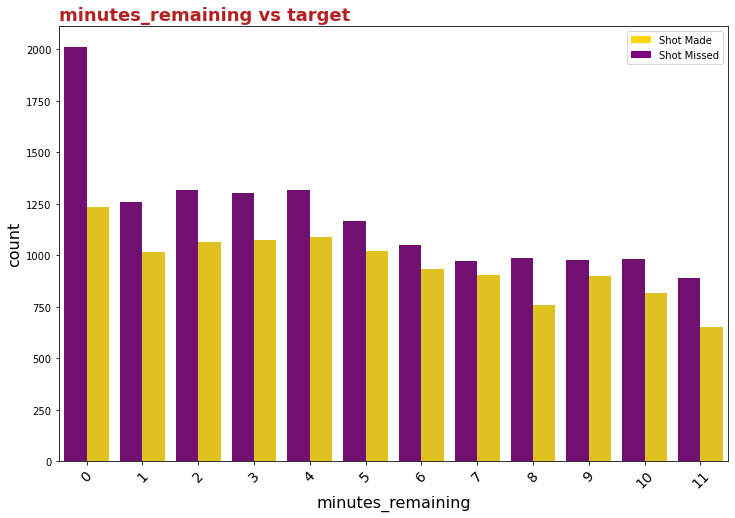

In [24]:
plotcat('minutes_remaining')

### When minutes remaining was less than 2 Kobe missed over 3000 shots but also made over 2000. Generally he missed more than he made but around 5-7 minutes that gap was less than usual.

## Now let's look at `period` feature.

In [25]:
descriptive_stats('period')

count    25697.000000
mean         2.520800
std          1.151626
min          1.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: period, dtype: float64
     
# of Unique values:7     

Unique values: [1 2 3 4 5 6 7]

Min of boxplot:-2.00
Max of boxplot: 6.00


### From our descriptive statistics we can see that most periods were less than 3 with 7 periods being a clear outlier. 

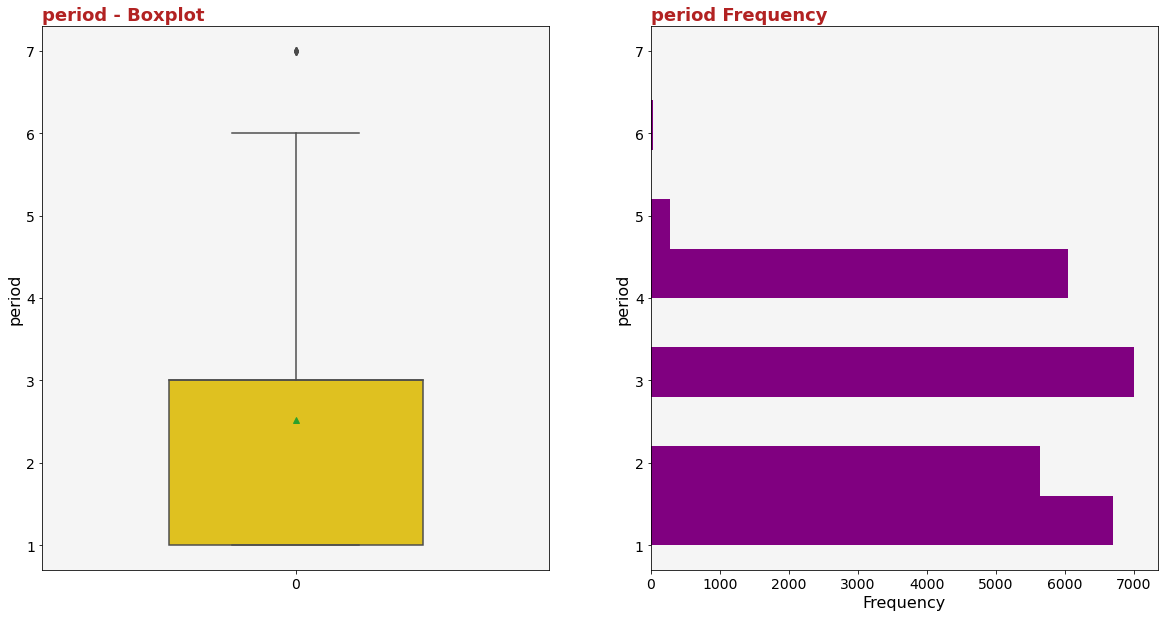

In [26]:
box_plot('period')

### From our boxplot we can see that 7 periods are a clear outlier. Our histogram shows that Kobe made most of his shots during the third period with a steep drop off after the fourth.

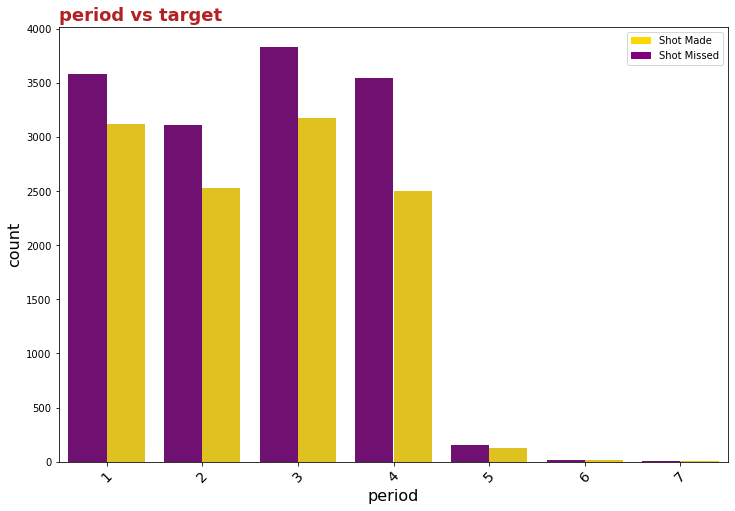

In [27]:
plotcat('period')

### Kobe missed most shots in every period, he also made the most shots during the 3rd period. After the 4th period Kobe's made and missed shots were the most balanced.

## Now let's look at `playoffs` feature.

In [28]:
descriptive_stats('playoffs')

count    25697.000000
mean         0.146243
std          0.353356
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: playoffs, dtype: float64
     
# of Unique values:2     

Unique values: [0 1]

Min of boxplot: 0.00
Max of boxplot: 0.00


### Out of all the shots Kobe made 14% of his shots were made during the playoffs.

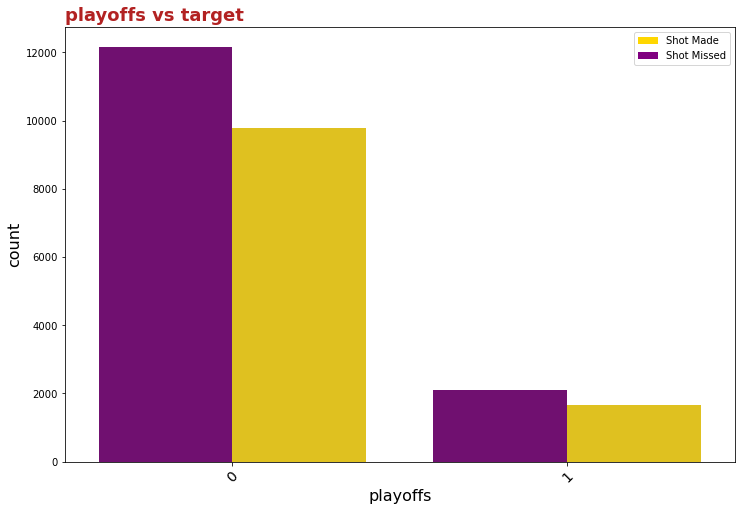

In [29]:
plotcat('playoffs')

### Whenk Kobe was in the playoffs the gap between his shots made and missed descreased significantly. During non playoff games the gap was much wider.

### Season

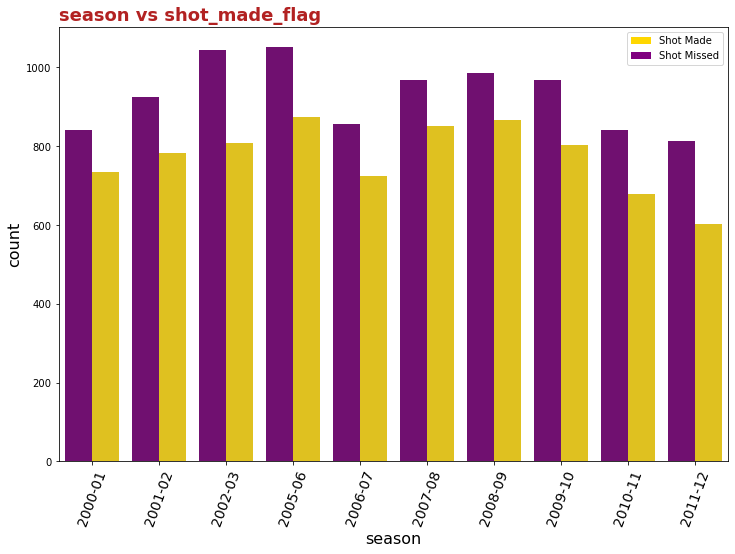

In [30]:
top_10_most_season = df['season'].value_counts()[:10].index

plt.figure(figsize=(12,8))
sns.countplot(x='season', hue='shot_made_flag', data=df.loc[df['season'].isin(top_10_most_season)]
              , palette={1:'gold', 0:'purple'});

plt.title('season' + ' vs shot_made_flag', 
          fontsize=18, fontweight='bold', color='firebrick', loc='left')

plt.ylabel('count', fontsize=16)
plt.xlabel('season', fontsize=16)

color_patches = [
    Patch(facecolor="gold", label='Shot Made'),
    Patch(facecolor="purple", label='Shot Missed')
]

plt.legend(handles=color_patches)

plt.xticks(rotation=70, fontsize=14); 

For the shots made, Kobe Bryant missed more shots than made for the top 10 seasons.  His best season was 2005-06. His worst season was 2011-12.

### Seconds remaining

In [31]:
descriptive_stats('seconds_remaining')

count    25697.000000
mean        28.311554
std         17.523392
min          0.000000
25%         13.000000
50%         28.000000
75%         43.000000
max         59.000000
Name: seconds_remaining, dtype: float64
     
# of Unique values:60     

Unique values: [22 45 52 19 32 12 36 56  0  9 44 16 48 50 29  8  4 57 47 11 30 20 13 59
 21 55 38  6 33 26 40  5  2 37  1 17 53 10 24 46 41 54 25 15 39 14 23 18
 34 51 28  3 43  7 42 27 35 31 58 49]

Min of boxplot:-32.00
Max of boxplot: 88.00


In [32]:
df.seconds_remaining.skew()

0.03525222199685529

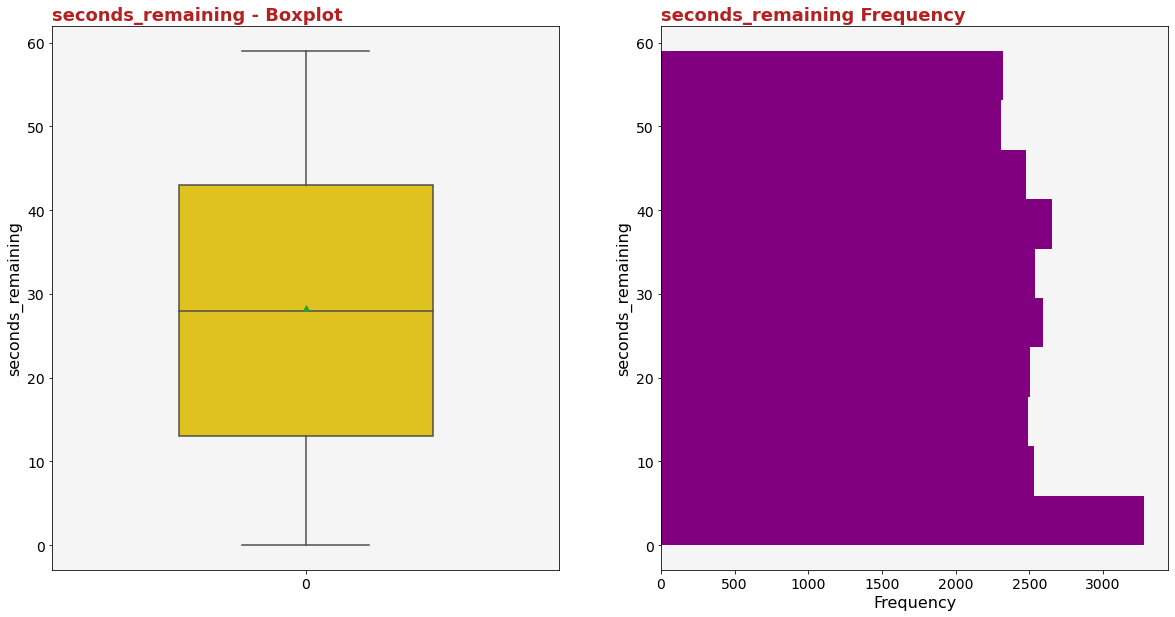

In [33]:
box_plot('seconds_remaining')

The mean and median are approximately the same.  The maximum time to make a shot is 59 seconds, and the minimum time is 0 seconds.  The data is positively skewed, and shows a large degree of spread. 

### Shot distaince

In [34]:
df.groupby('shot_distance')['shot_made_flag'].value_counts()

shot_distance  shot_made_flag
0              1.0               2925
               0.0               1683
1              1.0                345
               0.0                177
2              1.0                257
                                 ... 
70             0.0                  2
71             0.0                  1
74             0.0                  3
77             0.0                  1
79             0.0                  1
Name: shot_made_flag, Length: 111, dtype: int64

In [35]:
descriptive_stats('shot_distance')

count    25697.000000
mean        13.457096
std          9.388725
min          0.000000
25%          5.000000
50%         15.000000
75%         21.000000
max         79.000000
Name: shot_distance, dtype: float64
     
# of Unique values:74     

Unique values: [15 16 22  0 14 12 25 17  9  5 20 18 11  7 26 19  8 13 27  1 24 23  4 21
 47 10 29 28 42  3 48 30 45  2  6 33 36 62 31 70 43 38 60 37 40 32 56 35
 55 51 68 39 41 64 50 54 74 44 61 65 59 34 63 49 46 58 69 57 53 67 71 52
 77 79]

Min of boxplot:-19.00
Max of boxplot: 45.00


In [36]:
df.shot_distance.skew()

0.12720932371341717

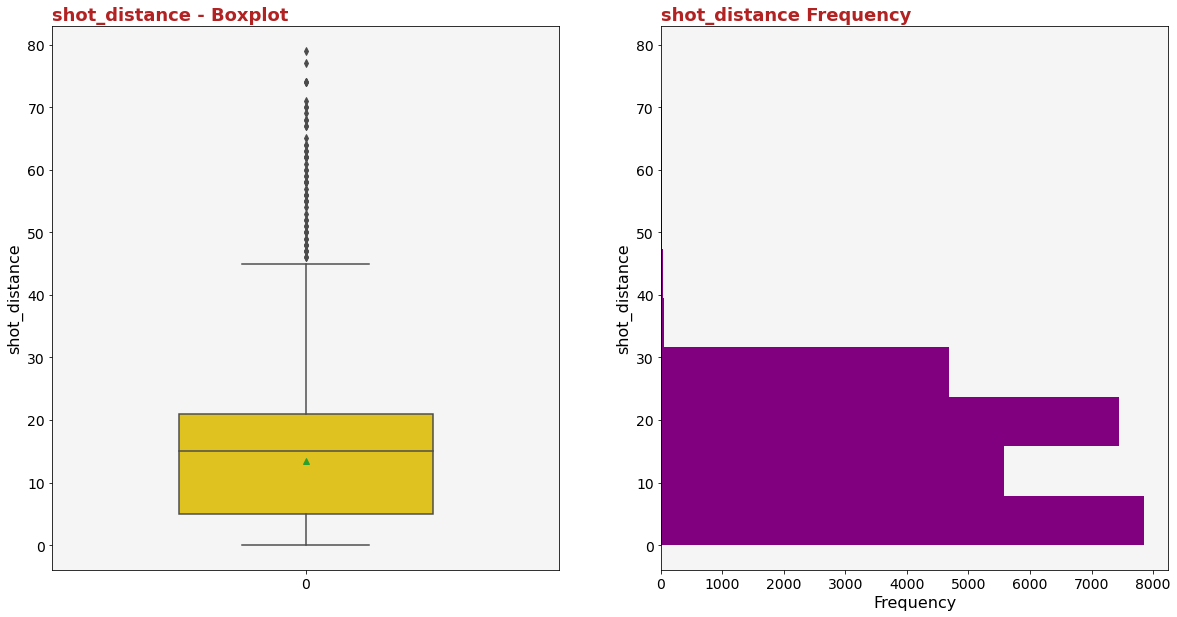

In [37]:
box_plot('shot_distance')

For shot distance, it's pretty apparent that most shots are made close to the basketball hoop (< 25).  The mean is offset slightly from the median.  The IQR is fairly small, with outliers occuring around the 45 mark.

### Shot type

In [38]:
descriptive_stats('shot_type')

count              25697
unique                 2
top       2PT Field Goal
freq               20285
Name: shot_type, dtype: object
     
# of Unique values:2     

Unique values: ['2PT Field Goal' '3PT Field Goal']


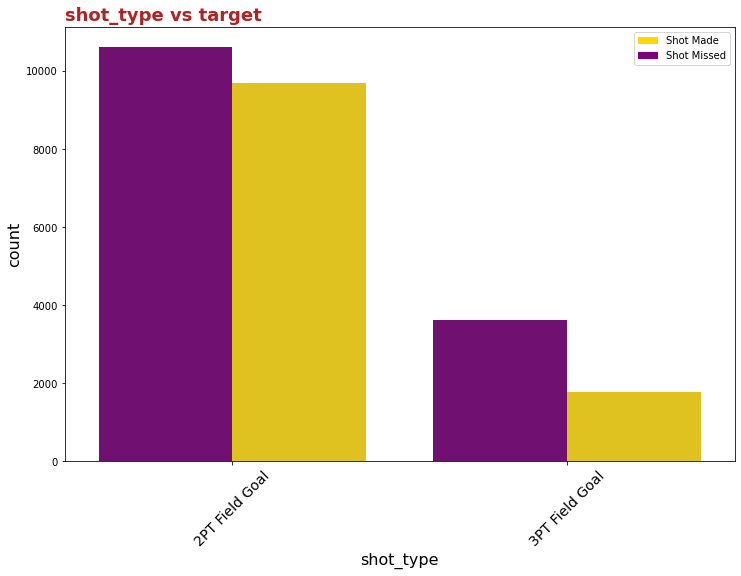

In [39]:
plotcat('shot_type')

The most common shot type was the 2PT field goal with over 10,000 missed, and over 9,000 made.  

### Shot zone area

In [40]:
descriptive_stats('shot_zone_area')

count         25697
unique            6
top       Center(C)
freq          11289
Name: shot_zone_area, dtype: object
     
# of Unique values:6     

Unique values: ['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']


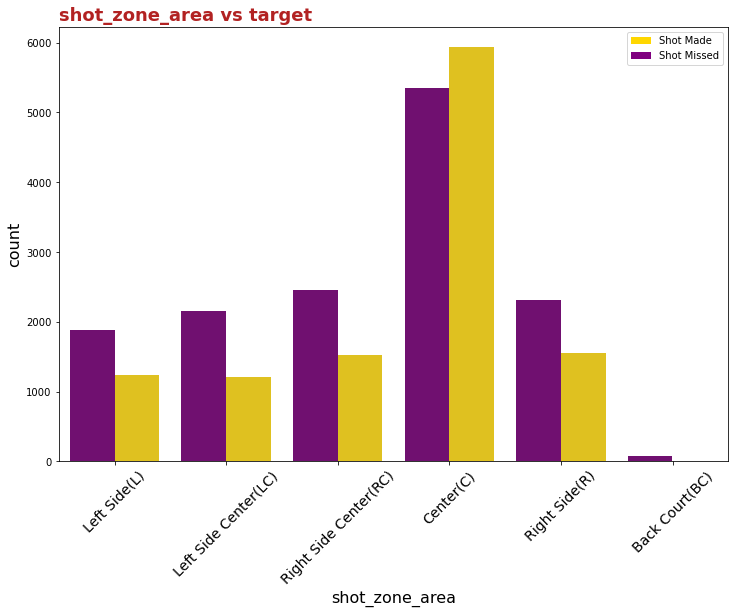

In [41]:
plotcat('shot_zone_area')

By far, the most common shot zone was the center with over 5,000 shotds missed, and almost 6,000 shots made.

## Shot Zone Basic

In [42]:
df.shot_zone_basic.value_counts()

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: shot_zone_basic, dtype: int64

In [43]:
df.groupby('shot_zone_basic')['shot_made_flag'].value_counts()

shot_zone_basic        shot_made_flag
Above the Break 3      0.0               3166
                       1.0               1554
Backcourt              0.0                 59
                       1.0                  1
In The Paint (Non-RA)  0.0               2117
                       1.0               1763
Left Corner 3          0.0                151
                       1.0                 89
Mid-Range              0.0               6253
                       1.0               4279
Restricted Area        1.0               3666
                       0.0               2266
Right Corner 3         0.0                220
                       1.0                113
Name: shot_made_flag, dtype: int64

In [44]:
descriptive_stats('shot_zone_basic')

count         25697
unique            7
top       Mid-Range
freq          10532
Name: shot_zone_basic, dtype: object
     
# of Unique values:7     

Unique values: ['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']


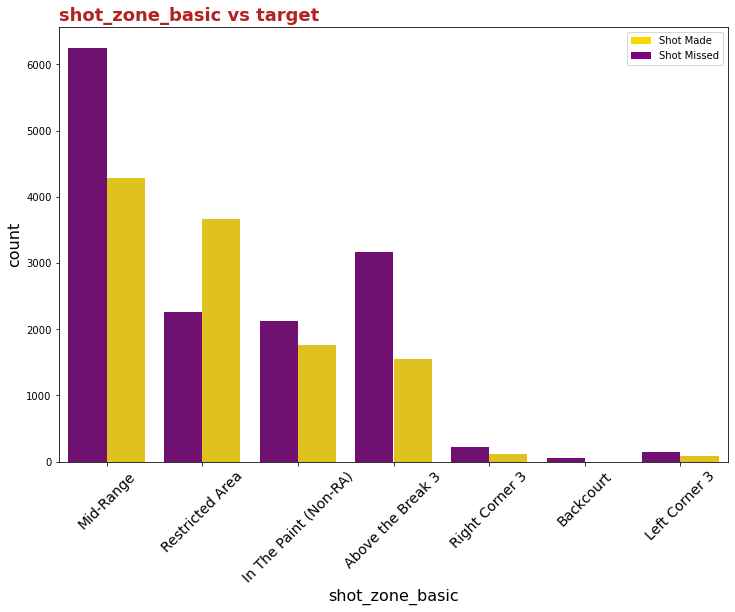

In [45]:
plotcat('shot_zone_basic')

## Shot Zone Basic

Observations
- Kobe has the best probability of making a shot if it is made from a "Restricted Area"
- He makes most of his shots from "Mid-Range"
- His probability of making a shot from "In The Paint" is roughly 50/50
- Out of all shots, only 60 were made from backcourt. These are hail-marry shots. Kobe made 1 of these. 

Action:
    - Dummify

## Shot Zone Range

In [46]:
df.shot_zone_range.value_counts()

Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5281
Back Court Shot      72
Name: shot_zone_range, dtype: int64

In [47]:
df.groupby('shot_zone_basic')['shot_made_flag'].value_counts()

shot_zone_basic        shot_made_flag
Above the Break 3      0.0               3166
                       1.0               1554
Backcourt              0.0                 59
                       1.0                  1
In The Paint (Non-RA)  0.0               2117
                       1.0               1763
Left Corner 3          0.0                151
                       1.0                 89
Mid-Range              0.0               6253
                       1.0               4279
Restricted Area        1.0               3666
                       0.0               2266
Right Corner 3         0.0                220
                       1.0                113
Name: shot_made_flag, dtype: int64

In [48]:
descriptive_stats('shot_zone_range')

count               25697
unique                  5
top       Less Than 8 ft.
freq                 7857
Name: shot_zone_range, dtype: object
     
# of Unique values:5     

Unique values: ['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']


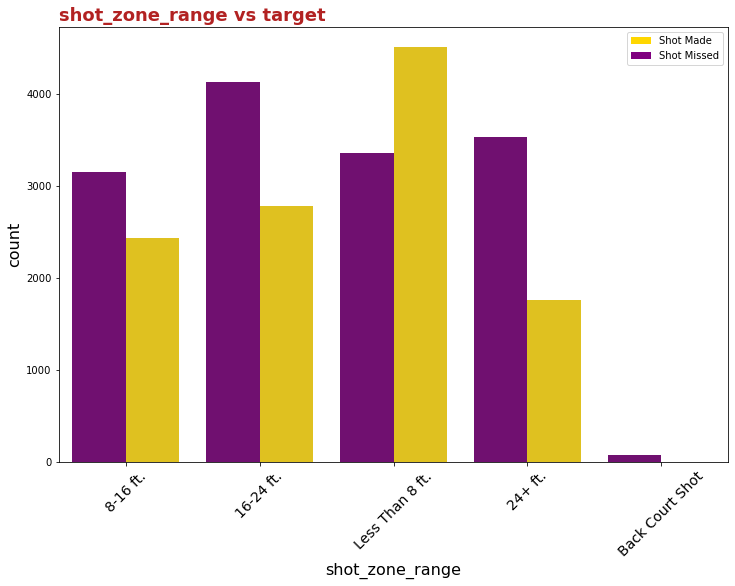

In [49]:
plotcat('shot_zone_range')

## Shot Zone Range

Observations 
- Kobe made most of his shots within 8ft of the basket. 
- Coincidentally, shots from this range were the only subgroup that had a higher proportion of "Shots Made"

Caution: 
- This feature overlaps with shot_zone_basic, and most likely other distance/position based features

Action: 
- Choose one of these overlapping features and dummify to include in models. 

## Game Date

In [50]:
df.game_date.value_counts().sort_index()

1996-11-03     1
1996-11-05     1
1996-11-06     3
1996-11-08     6
1996-11-10     3
              ..
2016-04-06    16
2016-04-08    14
2016-04-10    19
2016-04-11     9
2016-04-13    43
Name: game_date, Length: 1558, dtype: int64

In [51]:
df.groupby('game_date')['shot_made_flag'].value_counts().sort_index()

game_date   shot_made_flag
1996-11-03  0.0                1
1996-11-05  0.0                1
1996-11-06  0.0                1
            1.0                2
1996-11-08  0.0                4
                              ..
2016-04-10  1.0                9
2016-04-11  0.0                6
            1.0                3
2016-04-13  0.0               24
            1.0               19
Name: shot_made_flag, Length: 3084, dtype: int64

In [52]:
df['year'] = [x[:4] for x in df.game_date]

In [53]:
df.groupby('year')['shot_made_flag'].mean()

year
1996    0.376812
1997    0.430400
1998    0.432866
1999    0.460834
2000    0.471445
2001    0.462419
2002    0.441935
2003    0.432214
2004    0.428951
2005    0.448303
2006    0.467952
2007    0.450246
2008    0.476932
2009    0.468322
2010    0.439457
2011    0.448179
2012    0.436763
2013    0.448763
2014    0.379771
2015    0.348884
2016    0.362205
Name: shot_made_flag, dtype: float64

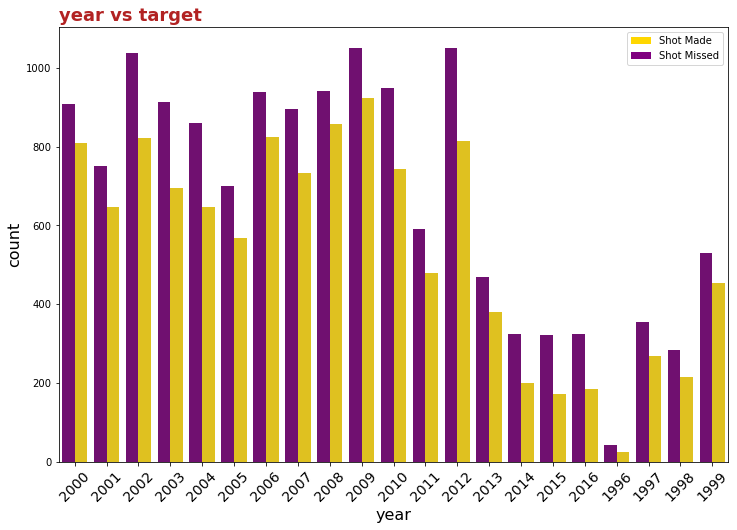

In [54]:
plotcat('year')

In [55]:
order=['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016']

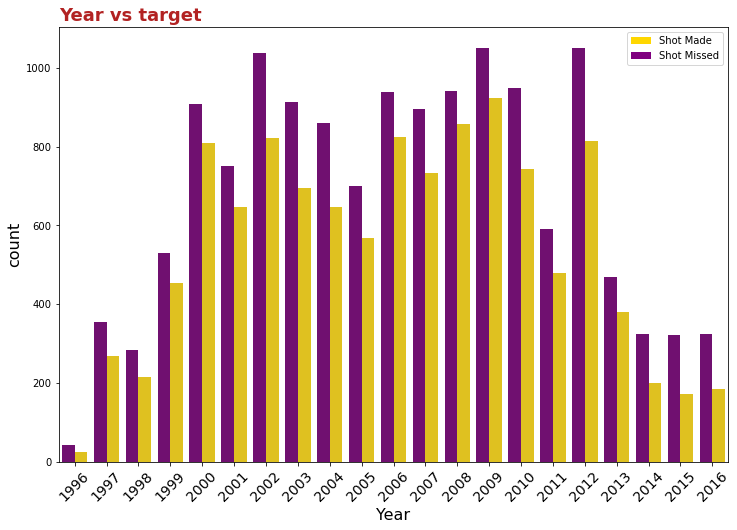

In [56]:
plt.figure(figsize=(12,8))
sns.countplot(x='year', hue='shot_made_flag', order=order, data=df, palette={1:'gold', 0:'purple'});

plt.title('Year vs target', 
          fontsize=18, fontweight='bold', color='firebrick', loc='left')

plt.ylabel('count', fontsize=16)
plt.xlabel('Year', fontsize=16)

color_patches = [
    Patch(facecolor="gold", label='Shot Made'),
    Patch(facecolor="purple", label='Shot Missed')
]

plt.legend(handles=color_patches)

plt.xticks(rotation=45, fontsize=14); 

## Game Date 

Observations
- This feature identify each game Kobe played. 
- This dataset includes 1558 games that Kobe played from 1996 to 2016

Action:
- I created a new feature `year` that grouped all years. We can dummify this column and include in models. 

## Matchup & Opponent

In [57]:
df.matchup.value_counts()

LAL @ SAS      853
LAL vs. SAS    765
LAL @ PHX      751
LAL @ SAC      751
LAL vs. HOU    722
              ... 
LAL @ PHO       29
LAL vs. NOP     21
LAL vs. SAN     20
LAL @ UTH       15
LAL vs. BKN     13
Name: matchup, Length: 74, dtype: int64

**Cleaning `matchup` to not inclut "LAL"**

In [58]:
df['matchup'] = [x[-3:] for x in df.matchup]

In [59]:
descriptive_stats('matchup')

count     25697
unique       38
top         SAS
freq       1618
Name: matchup, dtype: object
     
# of Unique values:38     

Unique values: ['POR' 'UTA' 'VAN' 'LAC' 'HOU' 'SAS' 'DEN' 'SAC' 'CHI' 'GSW' 'MIN' 'IND'
 'SEA' 'DAL' 'PHI' 'DET' 'MIL' 'TOR' 'MIA' 'PHX' 'CLE' 'NJN' 'NYK' 'CHH'
 'WAS' 'ORL' 'ATL' 'MEM' 'BOS' 'NOH' 'UTH' 'SAN' 'NOK' 'PHO' 'CHA' 'OKC'
 'BKN' 'NOP']


### Opponent

In [60]:
descriptive_stats('opponent')

count     25697
unique       33
top         SAS
freq       1638
Name: opponent, dtype: object
     
# of Unique values:33     

Unique values: ['POR' 'UTA' 'VAN' 'LAC' 'HOU' 'SAS' 'DEN' 'SAC' 'CHI' 'GSW' 'MIN' 'IND'
 'SEA' 'DAL' 'PHI' 'DET' 'MIL' 'TOR' 'MIA' 'PHX' 'CLE' 'NJN' 'NYK' 'CHA'
 'WAS' 'ORL' 'ATL' 'MEM' 'BOS' 'NOH' 'NOP' 'OKC' 'BKN']


In [61]:
[(a,b) for a,b in zip(df.matchup.value_counts().sort_index().index, df.opponent.value_counts().sort_index().index)]

[('ATL', 'ATL'),
 ('BKN', 'BKN'),
 ('BOS', 'BOS'),
 ('CHA', 'CHA'),
 ('CHH', 'CHI'),
 ('CHI', 'CLE'),
 ('CLE', 'DAL'),
 ('DAL', 'DEN'),
 ('DEN', 'DET'),
 ('DET', 'GSW'),
 ('GSW', 'HOU'),
 ('HOU', 'IND'),
 ('IND', 'LAC'),
 ('LAC', 'MEM'),
 ('MEM', 'MIA'),
 ('MIA', 'MIL'),
 ('MIL', 'MIN'),
 ('MIN', 'NJN'),
 ('NJN', 'NOH'),
 ('NOH', 'NOP'),
 ('NOK', 'NYK'),
 ('NOP', 'OKC'),
 ('NYK', 'ORL'),
 ('OKC', 'PHI'),
 ('ORL', 'PHX'),
 ('PHI', 'POR'),
 ('PHO', 'SAC'),
 ('PHX', 'SAS'),
 ('POR', 'SEA'),
 ('SAC', 'TOR'),
 ('SAN', 'UTA'),
 ('SAS', 'VAN'),
 ('SEA', 'WAS')]

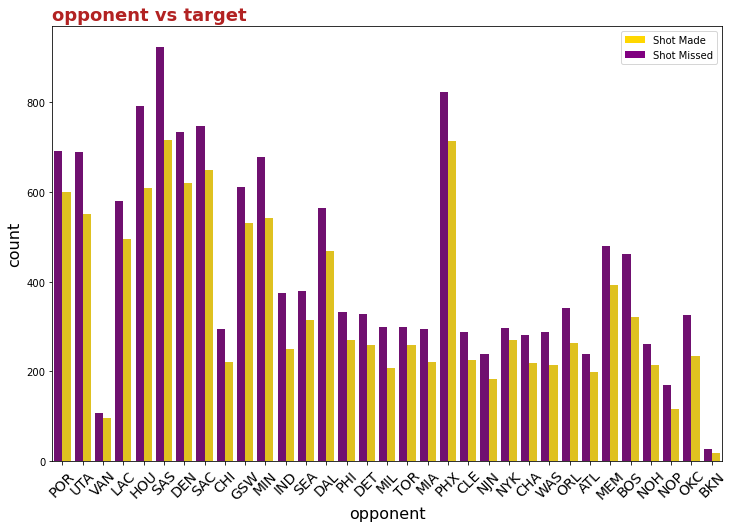

In [62]:
plotcat('opponent')

### Matchup and Opponent

Observations
- `matchup` and `opponent` overlap. For this reason we will include only `opponent` in our models

Action:
- Dummify 